# Harnessing the Power of SHAP Values

Let's import the libraries that will help us train our model and understand it's results.

In [2]:
import shap
import xgboost
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
sns.set_theme(style="darkgrid")

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Download the California housing dataset which contains some aggregated property attributes and a target varible for median house value. 

In [3]:
data = fetch_california_housing(as_frame=True)

As my stats lecturer always used to say, take a look at the data first, then do more complicated things.

In [14]:
df = pd.concat([data.data, data.target], axis=1)

In [5]:
data.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


The figure layout has changed to tight


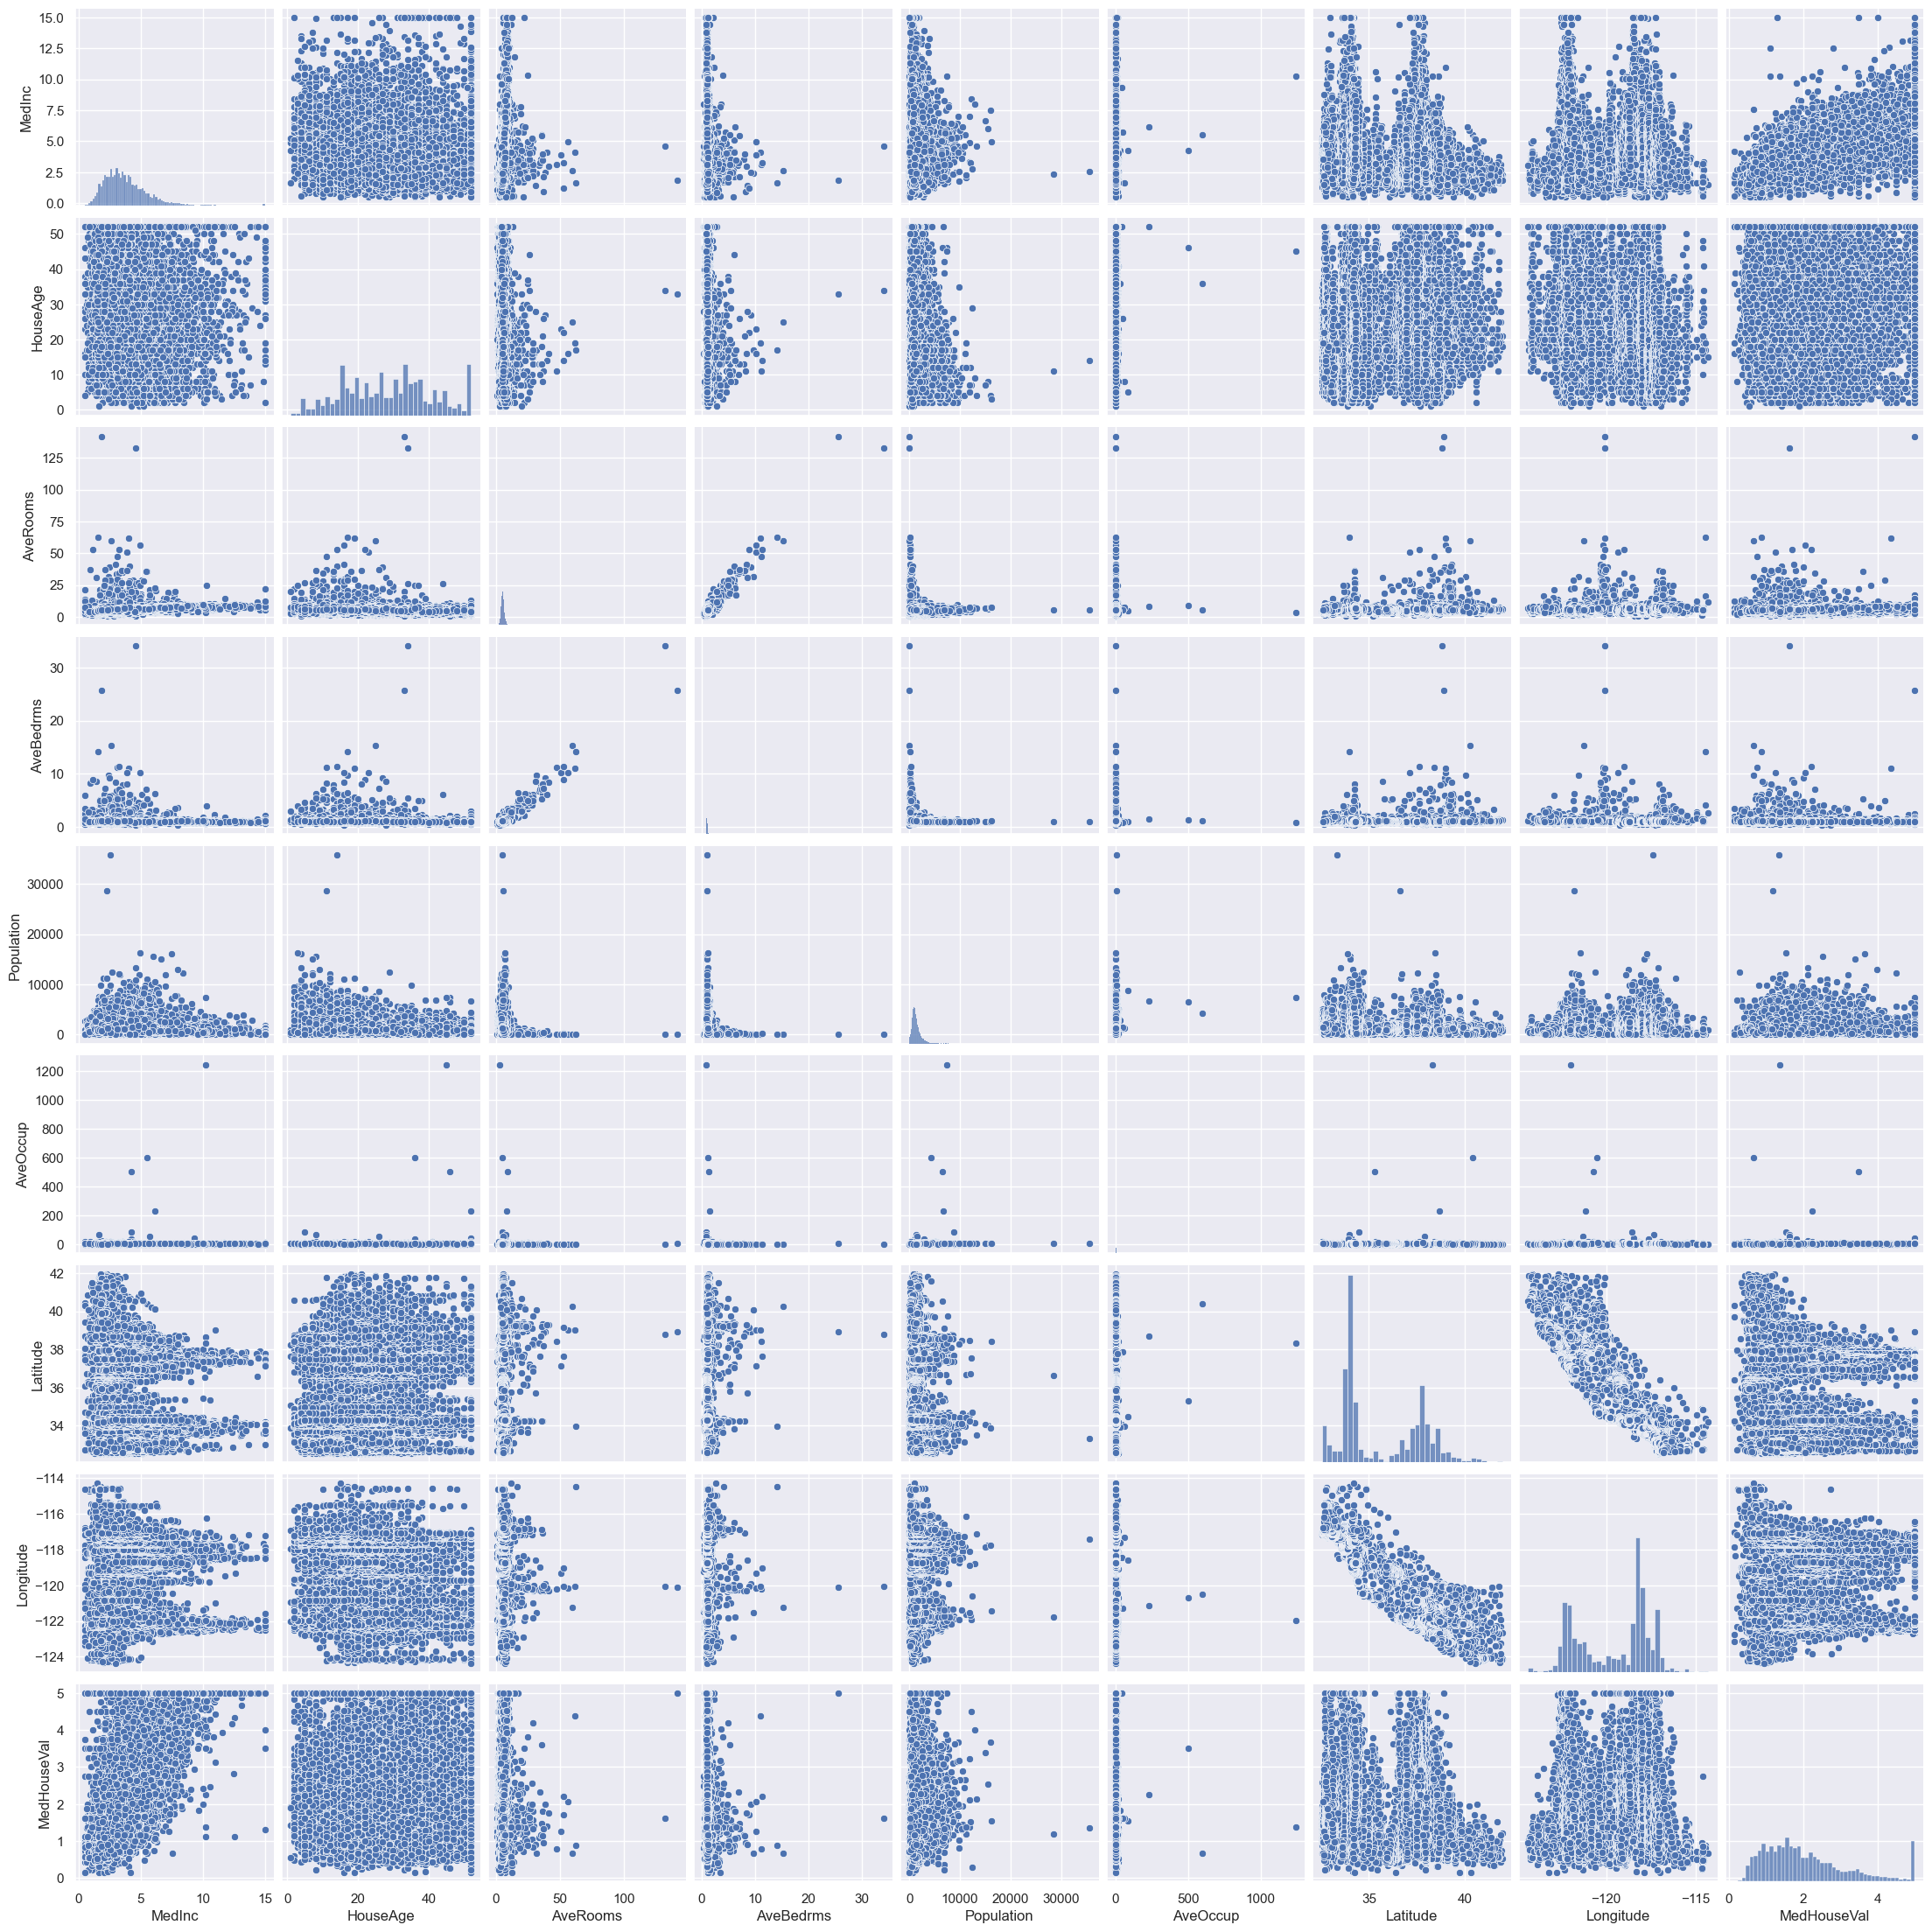

In [33]:
sns.pairplot(df)

In [34]:
corr_mat = df.corr().stack().reset_index(name="correlation")

The figure layout has changed to tight
The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.


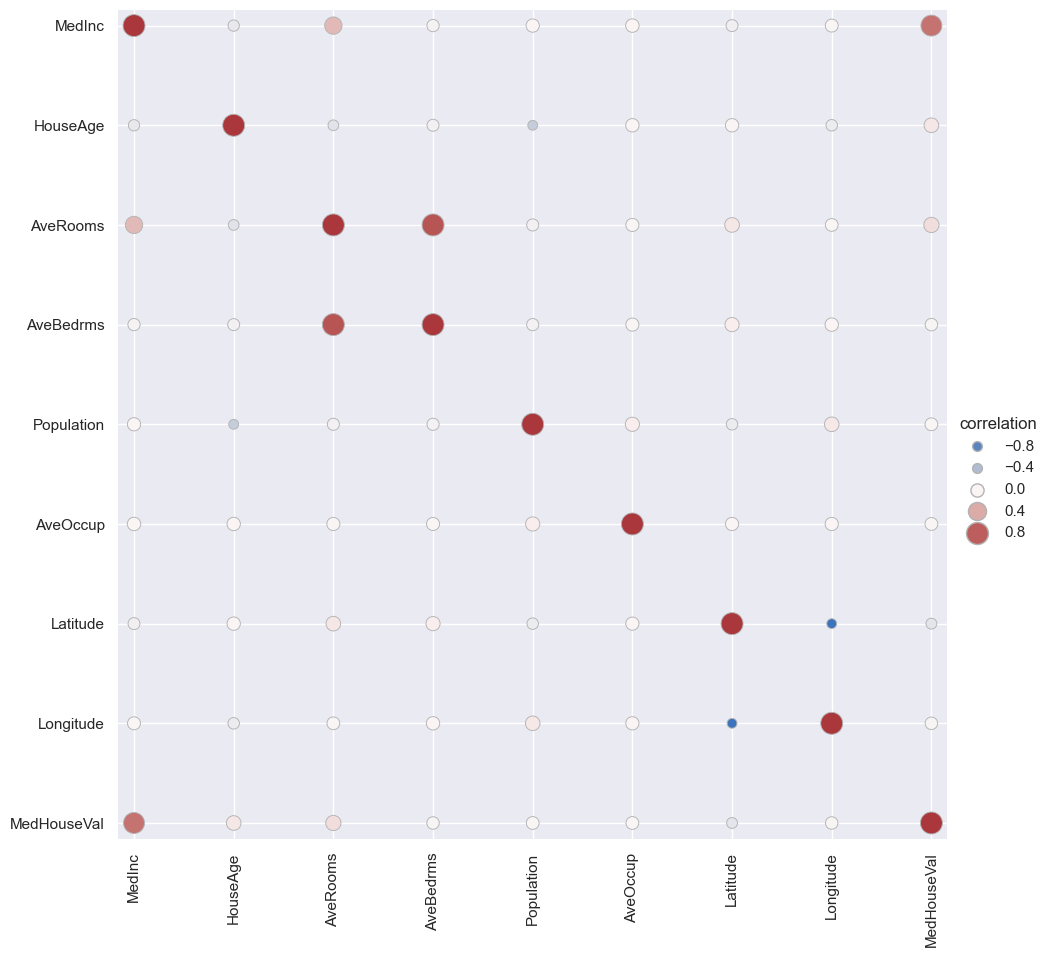

In [45]:
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

In [8]:
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
11943,4.0526,36.0,5.639506,1.096296,1425.0,3.518519,33.95,-117.43
6625,2.7148,42.0,4.222052,1.091884,2112.0,3.234303,34.17,-118.14
19150,3.7813,14.0,5.826196,1.035264,954.0,2.403023,38.35,-122.70
3367,2.1198,21.0,5.404110,0.965753,406.0,2.780822,40.17,-120.37
4981,1.5179,52.0,4.022663,1.005666,1080.0,3.059490,34.00,-118.30


In [27]:
features = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']

In [10]:
model = xgboost.XGBRegressor()

In [11]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [12]:
preds = model.predict(X_test)

In [13]:
math.sqrt(mean_squared_error(y_pred=preds, y_true=y_test))

0.47996443071064954

<Axes: >

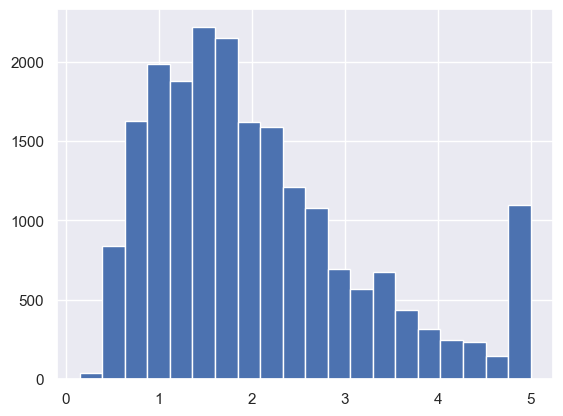

In [15]:
data.target.hist(bins=20)